# Post-processing of nnUNet predictions of SKM-TEA data
## First check connected components

In [118]:
# imports
import cc3d
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import SimpleITK as sitk

In [2]:
from acvl_utils.morphology.morphology_helper import generic_filter_components, remove_components_cc3d, cc3d_label_with_component_sizes

In [82]:
# data directory path
nnunet_data_dir = '../../data/nnUNet_raw/Dataset361_Menisci/'

In [119]:
# Let's look at the ground truth data
# path to ground truth data
gt_path = nnunet_data_dir + 'labels_all_skmtea/'
im_path = nnunet_data_dir + 'images_all_skmtea/'
pred_path = nnunet_data_dir + 'zscore_preds_all_skmtea/'

In [8]:
# get list of files in the directory
gt_files = os.listdir(gt_path)
gt_files.sort()
gt_files[:5]

['SKMTEA_001.nii.gz',
 'SKMTEA_002.nii.gz',
 'SKMTEA_003.nii.gz',
 'SKMTEA_004.nii.gz',
 'SKMTEA_005.nii.gz']

In [84]:
im_files = os.listdir(im_path)
im_files.sort()
im_files[:5]

['SKMTEA_001_0000.nii.gz',
 'SKMTEA_002_0000.nii.gz',
 'SKMTEA_003_0000.nii.gz',
 'SKMTEA_004_0000.nii.gz',
 'SKMTEA_005_0000.nii.gz']

In [120]:
pred_files = os.listdir(pred_path)
pred_files.sort()
pred_files[:5]

['SKMTEA_001.nii.gz',
 'SKMTEA_002.nii.gz',
 'SKMTEA_003.nii.gz',
 'SKMTEA_004.nii.gz',
 'SKMTEA_005.nii.gz']

In [111]:
# load in each image, and return labels and properties
smallest_components = []

for file in gt_files:
    # load in the image
    gt = sitk.ReadImage(gt_path + file)
    gt = sitk.GetArrayFromImage(gt)
    # get the properties of the image before and after removing components
    labels, props = cc3d_label_with_component_sizes(gt, connectivity=26)
    labels_filtered, props_filtered = cc3d_label_with_component_sizes(remove_components_cc3d(gt, 100, threshold_type='min', connectivity=26), connectivity=26)

    """
    # print the properties
    if len(props) > 2:
        print(f'File: {file}')
        print(f'Number of components before: {len(props)}')
        print(f'Number of components after: {len(props_filtered)}')
        print(f'Properties before: {props}')
        print(f'Properties after: {props_filtered}')
        print('----------------------------------------')"""
    
    # cycle through props dictionary and print smallest component
    smallest_components.append(min(list(props_filtered.values())))

In [116]:
# print smallest components
for i, comp in enumerate(smallest_components):
        print(i, comp)

0 21828
1 25386
2 18584
3 22686
4 25649
5 34858
6 17574
7 18019
8 14438
9 39992
10 38503
11 35016
12 39738
13 23174
14 5190
15 31961
16 22309
17 29580
18 27798
19 18709
20 28126
21 28112
22 22580
23 15240
24 23859
25 29480
26 33658
27 15360
28 7126
29 29890
30 28245
31 19791
32 12450
33 22820
34 21377
35 13082
36 22685
37 24791
38 18918
39 34746
40 12710
41 31596
42 25778
43 3940
44 17114
45 23546
46 29906
47 18702
48 27613
49 23286
50 24183
51 31903
52 13953
53 23436
54 30857
55 29086
56 24804
57 27026
58 17174
59 14673
60 21567
61 15275
62 30778
63 27044
64 25916
65 21060
66 11672
67 16950
68 28849
69 18637
70 23806
71 24380
72 20172
73 29771
74 28625
75 21465
76 14097
77 30360
78 16802
79 37604
80 16028
81 25722
82 17821
83 29899
84 30478
85 14712
86 51716
87 46590
88 12554
89 16566
90 16095
91 47348
92 38704
93 30587
94 18550
95 21614
96 15083
97 28107
98 24332
99 27777
100 27525
101 21423
102 18526
103 33142
104 25644
105 24769
106 17007
107 15914
108 12619
109 35861
110 37360
111

In [121]:
# load in each image, and return labels and properties
smallest_pred_components = []

for file in pred_files:
    # load in the image
    pred = sitk.ReadImage(pred_path + file)
    pred = sitk.GetArrayFromImage(pred)
    # get the properties of the image before and after removing components
    labels, props = cc3d_label_with_component_sizes(gt, connectivity=26)
    labels_filtered, props_filtered = cc3d_label_with_component_sizes(remove_components_cc3d(pred, 100, threshold_type='min', connectivity=26), connectivity=26)

    """
    # print the properties
    if len(props) > 2:
        print(f'File: {file}')
        print(f'Number of components before: {len(props)}')
        print(f'Number of components after: {len(props_filtered)}')
        print(f'Properties before: {props}')
        print(f'Properties after: {props_filtered}')
        print('----------------------------------------')"""
    
    # cycle through props dictionary and print smallest component
    smallest_pred_components.append(min(list(props_filtered.values())))

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /Users/runner/work/1/sitk/Code/IO/src/sitkImageReaderBase.cxx:105:
sitk::ERROR: Unable to determine ImageIO reader for "../../data/nnUNet_raw/Dataset361_Menisci/zscore_preds_all_skmtea/dataset.json"

In [122]:
# print smallest components
for i, comp in enumerate(smallest_pred_components):
        print(i, comp)

0 19954
1 33438
2 17508
3 29716
4 26948
5 33485
6 22156
7 21144
8 134
9 37774
10 36714
11 36572
12 27793
13 18502
14 17403
15 32915
16 24648
17 32216
18 21600
19 21687
20 23910
21 25475
22 24208
23 21833
24 20844
25 25621
26 31246
27 16827
28 13678
29 27453
30 28381
31 21106
32 15914
33 18953
34 25510
35 14571
36 20063
37 23622
38 19756
39 29763
40 10553
41 30710
42 25425
43 2643
44 19408
45 25078
46 31689
47 4724
48 25257
49 27108
50 26108
51 33870
52 14754
53 19272
54 32425
55 21910
56 29014
57 24434
58 16905
59 17896
60 19472
61 22455
62 29670
63 26308
64 23959
65 31242
66 17871
67 23122
68 29084
69 16372
70 20148
71 26590
72 21537
73 23775
74 28744
75 20825
76 13642
77 27771
78 17779
79 29686
80 17675
81 24251
82 18857
83 25102
84 25143
85 16306
86 44169
87 26178
88 17118
89 20148
90 14895
91 38457
92 34473
93 37402
94 18054
95 23036
96 18070
97 30601
98 24008
99 26214
100 26972
101 27109
102 15982
103 32709
104 27807
105 27488
106 25320
107 14356
108 15922
109 30942
110 34235
111 

File SKMTEA_009.nii.gz has 3 components: {1: 16997, 2: 14080, 3: 134}


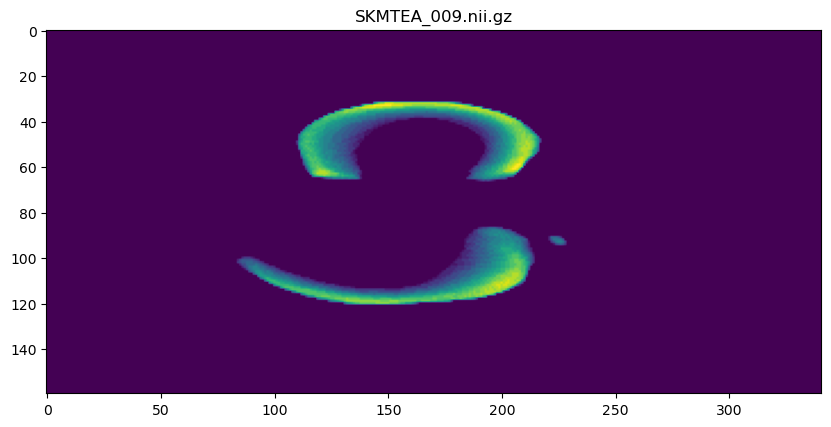

In [123]:
# Pick a file to look at
file = pred_files[8]

# load in the image
gt = sitk.ReadImage(pred_path + file)
gt = sitk.GetArrayFromImage(gt)

# get the labels and properties
labels, props = cc3d_label_with_component_sizes(gt, connectivity=26)

# print the properties
print(f"File {file} has {len(props)} components: {props}")

# plot the labels (mask with 1 for first component, 2 for second etc)
plt.figure(figsize=(10, 10))
plt.imshow(np.sum(gt, axis=1))
plt.title(file)
plt.show()

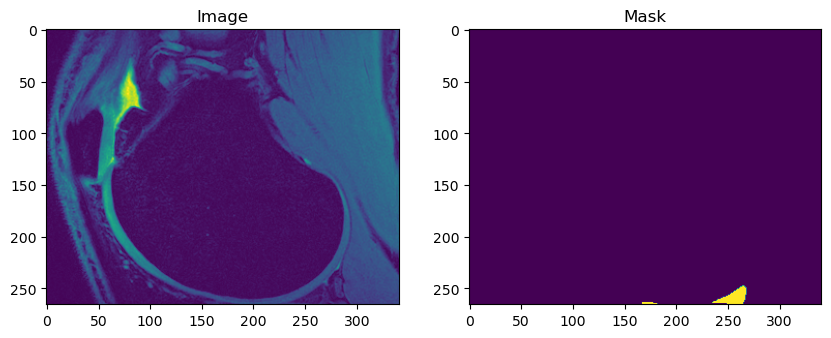

In [107]:
# Let's look at the image
# load in the image
im = sitk.ReadImage(im_path + im_files[52])
im = sitk.GetArrayFromImage(im)

# plot the image and mask side by side
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(im[40,...])
plt.title('Image')
plt.subplot(1, 2, 2)
plt.imshow(gt[40,...])
plt.title('Mask')
plt.show()

In [117]:
# damn, cropped too low. Will need to correct and re-predict :(